In [22]:
import pandas as pd
df = pd.read_csv('dataset/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [23]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [24]:
len(df)

2900

In [25]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [26]:
df.value_counts("Personality")

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [27]:
df.value_counts('Stage_fear')

Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64

In [28]:
df.value_counts("Drained_after_socializing")

Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64

In [29]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

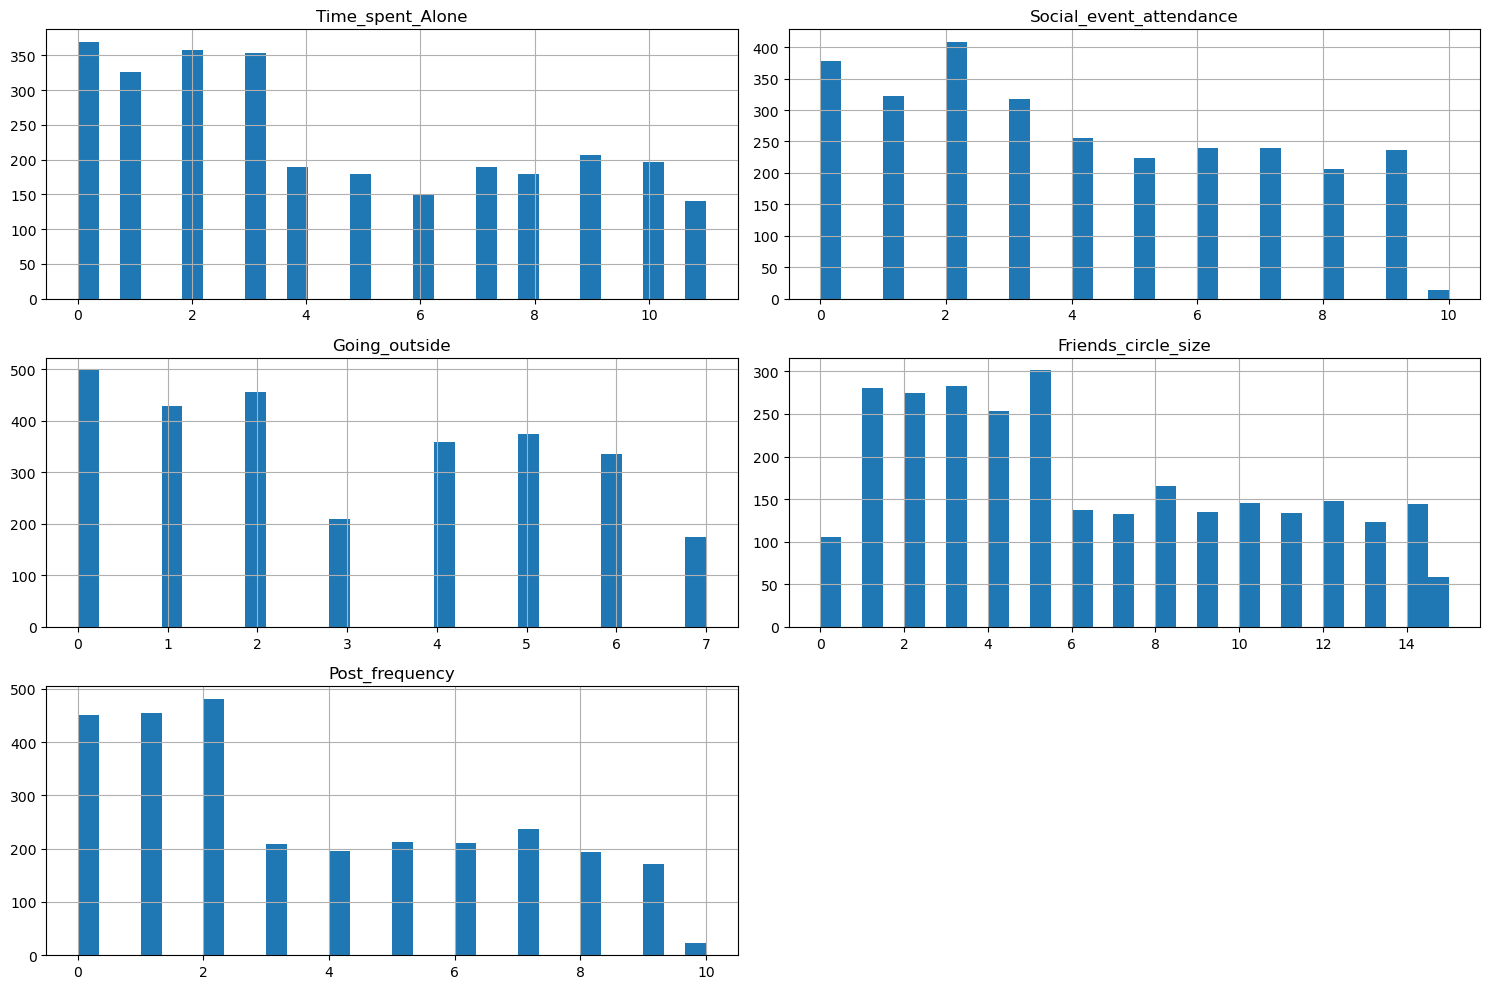

In [30]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10),bins = 30)
plt.tight_layout()
plt.show()

Most of the columns has right_skewed charts. 

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [32]:
num_cols = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
cat_cols = ['Stage_fear','Drained_after_socializing']

In [33]:
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

In [34]:
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown = "ignore"))
])

In [35]:
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

In [36]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter = 1000))
])

In [37]:
#Splitting the data
X = df.drop('Personality',axis=1)
y = df['Personality']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [40]:
y_pred = model.predict (X_test)

In [41]:
from sklearn.metrics import classification_report
target_names = ['Introvert','Extrovert']
report = classification_report(y_test, y_pred, target_names = target_names)
report

'              precision    recall  f1-score   support\n\n   Introvert       0.93      0.92      0.93       302\n   Extrovert       0.91      0.92      0.92       278\n\n    accuracy                           0.92       580\n   macro avg       0.92      0.92      0.92       580\nweighted avg       0.92      0.92      0.92       580\n'

In [42]:
import pickle 
pickle.dump(model, open ("personality_model.pkl", "wb"))
print("Model saved!")

Model saved!
